In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score


In [2]:
data=pd.read_csv(r"C:\Users\Madhav\Downloads\Supermart Grocery Sales - Retail Analytics Dataset.csv")
data

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu
...,...,...,...,...,...,...,...,...,...,...,...
9989,OD9990,Sudeep,"Eggs, Meat & Fish",Eggs,Madurai,12/24/2015,West,945,0.16,359.10,Tamil Nadu
9990,OD9991,Alan,Bakery,Biscuits,Kanyakumari,07-12-2015,West,1195,0.26,71.70,Tamil Nadu
9991,OD9992,Ravi,Food Grains,Rice,Bodi,06-06-2017,West,1567,0.16,501.44,Tamil Nadu
9992,OD9993,Peer,Oil & Masala,Spices,Pudukottai,10/16/2018,West,1659,0.15,597.24,Tamil Nadu


In [3]:
print(data['Order Date'].head(20))
print(data['Order Date'].tail(20))


0     11-08-2017
1     11-08-2017
2     06-12-2017
3     10-11-2016
4     10-11-2016
5     06-09-2015
6     06-09-2015
7     06-09-2015
8     06-09-2015
9     06-09-2015
10    06-09-2015
11    06-09-2015
12     4/15/2018
13    12-05-2017
14    11/22/2016
15    11/22/2016
16    11-11-2015
17     5/13/2015
18     8/27/2015
19     8/27/2015
Name: Order Date, dtype: object
9974    12/24/2015
9975    11/21/2018
9976    06-06-2017
9977     3/28/2015
9978     3/19/2016
9979     3/18/2015
9980     8/31/2018
9981    08-09-2015
9982     8/28/2018
9983    12-06-2017
9984     8/31/2016
9985    11/13/2016
9986    05-08-2018
9987    10/19/2015
9988    11-03-2016
9989    12/24/2015
9990    07-12-2015
9991    06-06-2017
9992    10/16/2018
9993     4/17/2018
Name: Order Date, dtype: object


In [4]:
print(data.isnull().sum())
print(data.info())

Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB
None


In [5]:
data.dropna(inplace=True)

In [6]:
data.drop_duplicates(inplace=True)

In [7]:
data['Order Date'] = pd.to_datetime(data['Order Date'], format='mixed',  errors='coerce')


In [8]:
data['Order Day']= data['Order Date'].dt.day
data['Order Month']= data['Order Date'].dt.month
data['Order Year']= data['Order Date'].dt.year
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9994 non-null   object        
 1   Customer Name  9994 non-null   object        
 2   Category       9994 non-null   object        
 3   Sub Category   9994 non-null   object        
 4   City           9994 non-null   object        
 5   Order Date     9994 non-null   datetime64[ns]
 6   Region         9994 non-null   object        
 7   Sales          9994 non-null   int64         
 8   Discount       9994 non-null   float64       
 9   Profit         9994 non-null   float64       
 10  State          9994 non-null   object        
 11  Order Day      9994 non-null   int32         
 12  Order Month    9994 non-null   int32         
 13  Order Year     9994 non-null   int32         
dtypes: datetime64[ns](1), float64(2), int32(3), int64(1), object(7)
memory u

In [9]:
print(data.head())

  Order ID Customer Name          Category      Sub Category         City  \
0      OD1        Harish      Oil & Masala           Masalas      Vellore   
1      OD2         Sudha         Beverages     Health Drinks  Krishnagiri   
2      OD3       Hussain       Food Grains      Atta & Flour   Perambalur   
3      OD4       Jackson  Fruits & Veggies  Fresh Vegetables   Dharmapuri   
4      OD5       Ridhesh       Food Grains   Organic Staples         Ooty   

  Order Date Region  Sales  Discount  Profit       State  Order Day  \
0 2017-11-08  North   1254      0.12  401.28  Tamil Nadu          8   
1 2017-11-08  South    749      0.18  149.80  Tamil Nadu          8   
2 2017-06-12   West   2360      0.21  165.20  Tamil Nadu         12   
3 2016-10-11  South    896      0.25   89.60  Tamil Nadu         11   
4 2016-10-11  South   2355      0.26  918.45  Tamil Nadu         11   

   Order Month  Order Year  
0           11        2017  
1           11        2017  
2            6        2

C:\Users\Madhav\AppData\Local\Temp\ipykernel_9876\1281761980.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y='Sales', data=data, palette='rainbow')


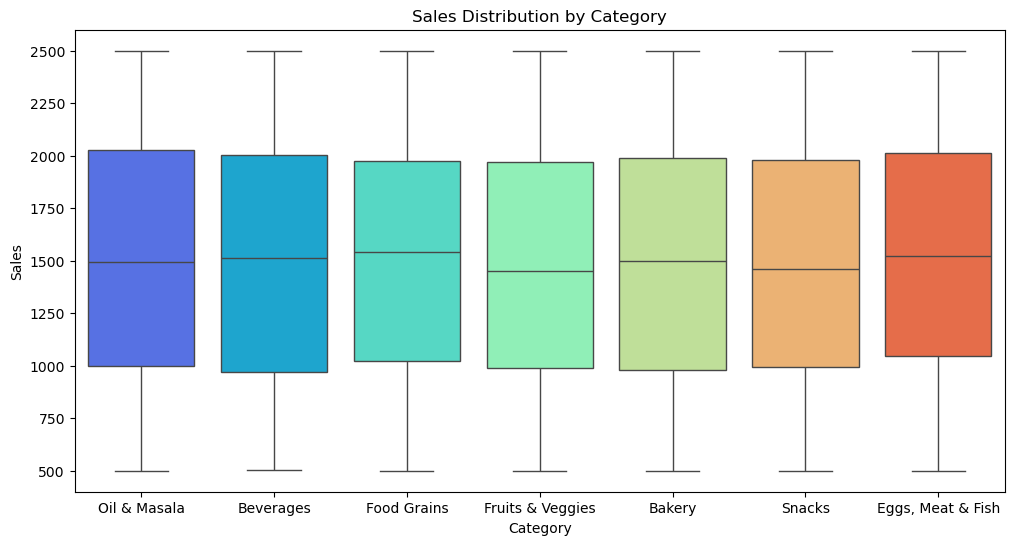

In [10]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='Sales', data=data, palette='rainbow')
plt.title('Sales Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.show()

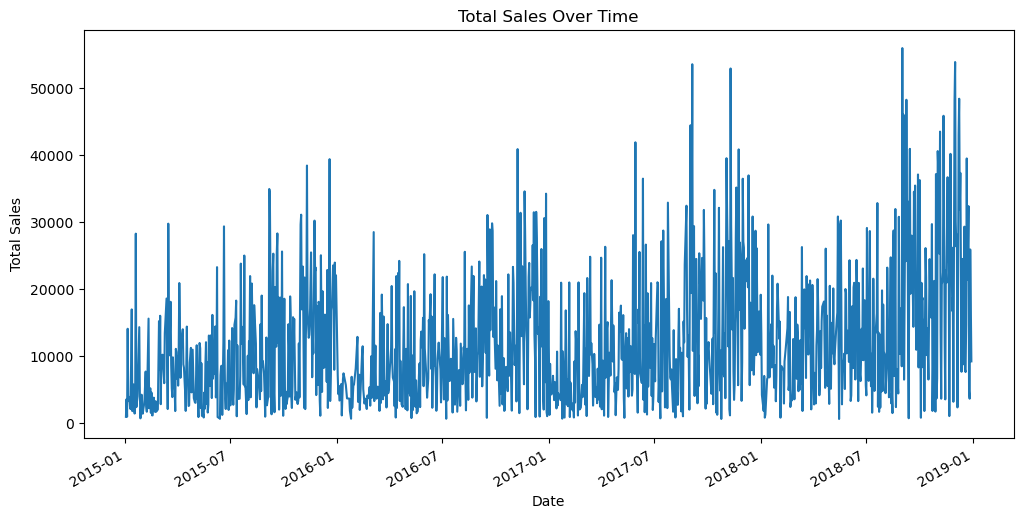

In [11]:
plt.figure(figsize=(12, 6))
data.groupby('Order Date')['Sales'].sum().plot()
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

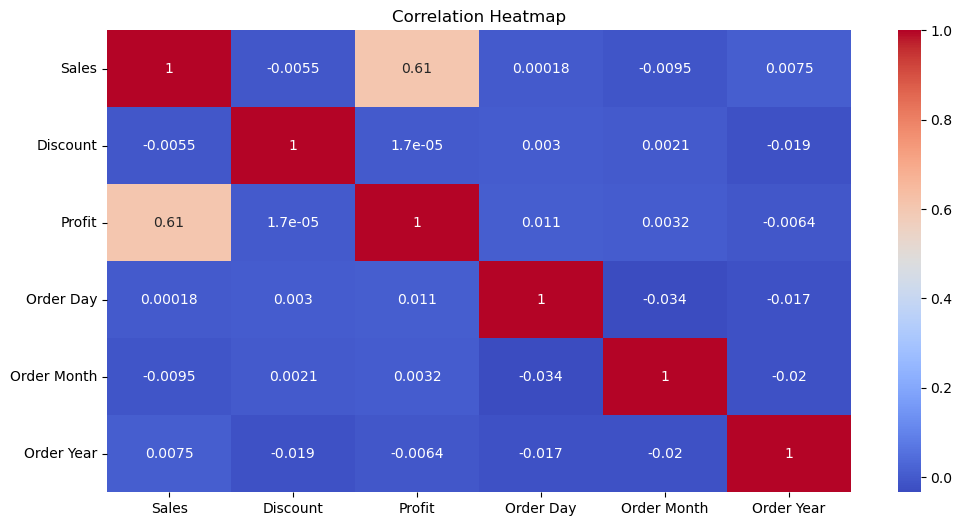

In [12]:
plt.figure(figsize=(12, 6))
corr_matrix = data.select_dtypes(include=['number']).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [13]:
features = data.drop(columns=['Order ID', 'Customer Name',
'Order Date', 'Sales'])
features = pd.get_dummies(features, drop_first=True)
target = data['Sales']

X_train, X_test, y_train, y_test = train_test_split(features,
target, test_size=0.2, random_state=42)

In [14]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [15]:
# Calculate MSE and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 215058.0381583354
R-squared: 0.34794660474903083


In [16]:
print(data[['Sales','Profit']].corr())


           Sales    Profit
Sales   1.000000  0.605349
Profit  0.605349  1.000000


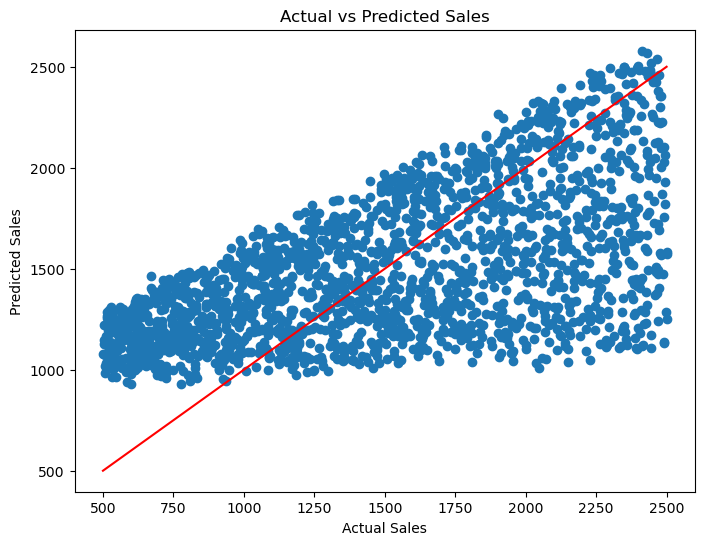

In [17]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test),
max(y_test)],
[min(y_test),
max(y_test)], color='red')
plt.title('Actual vs Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()